Sentiment Analysis On Elon Musk.csv

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [8]:
sw=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Text-Mining/stop.txt',sep='|', encoding='latin-1')
sw

,a
0,a's
1,able
2,about
3,above
4,according
...,...
565,yours
566,yourself
567,yourselves
568,z


In [9]:
sw.columns

Index(['a'], dtype='object')

PreProcessing Data

In [10]:
sw=[a.strip() for a in sw.a] # remove both the leading and the trailing characters
sw=[a for a in sw if a] # removes empty strings, because they are considered in Python as False
sw[0:10]

["a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards']

In [11]:
sw_text=' '.join(sw)
sw_text

"a's able about above according accordingly across actually after afterwards again against ain't all allow allows almost alone along already also although always am among amongst an and another any anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate are aren't around as aside ask asking associated at available away awfully b be became because become becomes becoming been before beforehand behind being believe below beside besides best better between beyond both brief but by c c'mon c's came can can't cannot cant cause causes certain certainly changes clearly co com come comes concerning consequently consider considering contain containing contains corresponding could couldn't course currently d definitely described despite did didn't different do does doesn't doing don't done down downwards during e each edu eg eight either else elsewhere enough entirely especially et etc even ever every everybody everyone everything everywhere ex exactly example 

In [13]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
sw_tokens=tknzr.tokenize(sw_text)
print(sw_tokens)

["a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains',

In [15]:
sw_tokens_text=' '.join(sw_tokens)
sw_tokens_text

"a's able about above according accordingly across actually after afterwards again against ain't all allow allows almost alone along already also although always am among amongst an and another any anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate are aren't around as aside ask asking associated at available away awfully b be became because become becomes becoming been before beforehand behind being believe below beside besides best better between beyond both brief but by c c'mon c's came can can't cannot cant cause causes certain certainly changes clearly co com come comes concerning consequently consider considering contain containing contains corresponding could couldn't course currently d definitely described despite did didn't different do does doesn't doing don't done down downwards during e each edu eg eight either else elsewhere enough entirely especially et etc even ever every everybody everyone everything everywhere ex exactly example 

In [16]:
no_punc_text=sw_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'as able about above according accordingly across actually after afterwards again against aint all allow allows almost alone along already also although always am among amongst an and another any anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate are arent around as aside ask asking associated at available away awfully b be became because become becomes becoming been before beforehand behind being believe below beside besides best better between beyond both brief but by c cmon cs came can cant cannot cant cause causes certain certainly changes clearly co com come comes concerning consequently consider considering contain containing contains corresponding could couldnt course currently d definitely described despite did didnt different do does doesnt doing dont done down downwards during e each edu eg eight either else elsewhere enough entirely especially et etc even ever every everybody everyone everything everywhere ex exactly example except f f

In [17]:
import re
no_url_text=re.sub(r'http\S+','',no_punc_text)
no_url_text

'as able about above according accordingly across actually after afterwards again against aint all allow allows almost alone along already also although always am among amongst an and another any anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate are arent around as aside ask asking associated at available away awfully b be became because become becomes becoming been before beforehand behind being believe below beside besides best better between beyond both brief but by c cmon cs came can cant cannot cant cause causes certain certainly changes clearly co com come comes concerning consequently consider considering contain containing contains corresponding could couldnt course currently d definitely described despite did didnt different do does doesnt doing dont done down downwards during e each edu eg eight either else elsewhere enough entirely especially et etc even ever every everybody everyone everything everywhere ex exactly example except f f

In [18]:
#Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['as', 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', 'aint', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', 'arent', 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', 'cmon', 'cs', 'came', 'can', 'cant', 'can', 'not', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains', '

In [20]:
len(text_tokens)

571

In [21]:
#remove stopwords
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['able', 'according', 'accordingly', 'across', 'actually', 'afterwards', 'aint', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'amongst', 'another', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'arent', 'around', 'aside', 'ask', 'asking', 'associated', 'available', 'away', 'awfully', 'b', 'became', 'become', 'becomes', 'becoming', 'beforehand', 'behind', 'believe', 'beside', 'besides', 'best', 'better', 'beyond', 'brief', 'c', 'cmon', 'cs', 'came', 'cant', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains', 'corresponding', 'could', 'couldnt', 'course', 'currently', 'definitely', 'described', 'despite', 'didnt', 'different', 'doesnt', 'dont', 'done', 'downwards', 'e', 'edu', 'eg', 'eight', 'either', 'else', 'elsewhe

In [22]:
#Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['et', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'f', 'far', 'fifth', 'first', 'five', 'followed', 'following', 'follows', 'former', 'formerly', 'forth', 'four', 'furthermore', 'g', 'get', 'gets', 'getting', 'given', 'gives', 'go', 'goes', 'going', 'gone', 'got', 'gotten', 'greetings', 'h', 'hadnt', 'happens', 'hardly', 'hasnt', 'havent', 'hes', 'hello', 'help', 'hence', 'heres', 'hereafter', 'hereby', 'herein', 'hereupon', 'hi', 'hither', 'hopefully', 'howbeit', 'however', 'id', 'ill', 'im', 'ive', 'ie', 'ignored', 'immediate', 'inasmuch', 'inc', 'indeed', 'indicate', 'indicated', 'indicates', 'inner', 'insofar', 'instead', 'inward', 'isnt', 'itd', 'itll', 'j', 'k', 'keep', 'keeps', 'kept', 'know', 'knows', 'known', 'l', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', 'lets', 'like', 'liked']


In [23]:
#Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['et', 'etc', 'even', 'ever', 'everi', 'everybodi', 'everyon', 'everyth', 'everywher', 'ex', 'exactli', 'exampl', 'except', 'f', 'far', 'fifth', 'first', 'five', 'follow', 'follow', 'follow', 'former', 'formerli', 'forth', 'four', 'furthermor', 'g', 'get', 'get', 'get', 'given', 'give', 'go', 'goe', 'go', 'gone', 'got', 'gotten', 'greet', 'h', 'hadnt', 'happen', 'hardli', 'hasnt', 'havent', 'he', 'hello', 'help', 'henc', 'here', 'hereaft', 'herebi', 'herein', 'hereupon', 'hi', 'hither', 'hope', 'howbeit', 'howev', 'id', 'ill', 'im', 'ive', 'ie', 'ignor', 'immedi', 'inasmuch', 'inc', 'inde', 'indic', 'indic', 'indic', 'inner', 'insofar', 'instead', 'inward', 'isnt', 'itd', 'itll', 'j', 'k', 'keep', 'keep', 'kept', 'know', 'know', 'known', 'l', 'last', 'late', 'later', 'latter', 'latterli', 'least', 'less', 'lest', 'let', 'let', 'like', 'like']


In [24]:
#Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

able according accordingly across actually afterwards aint allow allows almost alone along already also although always among amongst another anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate arent around aside ask asking associated available away awfully b became become becomes becoming beforehand behind believe beside besides best better beyond brief c cmon cs came cant cant cause causes certain certainly changes clearly co com come comes concerning consequently consider considering contain containing contains corresponding could couldnt course currently definitely described despite didnt different doesnt dont done downwards e edu eg eight either else elsewhere enough entirely especially et etc even ever every everybody everyone everything everywhere ex exactly example except f far fifth first five followed following follows former formerly forth four furthermore g get gets getting given gives go goes going gone got gotten greetings h hadnt ha

In [25]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['able', 'accord', 'accordingly', 'across', 'actually', 'afterwards', 'be', 'not', 'allow', 'allow', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'amongst', 'another', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'be', 'not', 'around', 'aside', 'ask', 'ask', 'associate', 'available', 'away', 'awfully', 'b', 'became', 'become', 'become', 'become', 'beforehand', 'behind', 'believe', 'beside', 'besides', 'well', 'well', 'beyond', 'brief', 'c', 'cmon', 'cs', 'come', 'can', 'not', 'can', 'not', 'cause', 'cause', 'certain', 'certainly', 'change', 'clearly', 'co', 'com', 'come', 'come', 'concern', 'consequently', 'consider', 'consider', 'contain', 'contain', 'contain', 'correspond', 'could', 'could', 'not', 'course', 'currently', 'definitely', 'describe', 'despite', 'do', 'not', 'different', 'do', 'not', 'do', 'not', 'do', 'downward', 'e', 'edu', 'eg', 'eight', 'either', 'else', 'el

In [26]:
clean_sw=' '.join(lemmas)
clean_sw

'able accord accordingly across actually afterwards be not allow allow almost alone along already also although always among amongst another anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate be not around aside ask ask associate available away awfully b became become become become beforehand behind believe beside besides well well beyond brief c cmon cs come can not can not cause cause certain certainly change clearly co com come come concern consequently consider consider contain contain contain correspond could could not course currently definitely describe despite do not different do not do not do downward e edu eg eight either else elsewhere enough entirely especially et etc even ever every everybody everyone everything everywhere ex exactly example except f far fifth first five follow following follow former formerly forth four furthermore g get gets getting give gives go go going gone got get greeting h have not happen hardly have not have

Feature Extraction

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
swcv=cv.fit_transform(lemmas)

In [28]:
print(cv.vocabulary_)

{'able': 0, 'accord': 1, 'accordingly': 2, 'across': 3, 'actually': 4, 'afterwards': 5, 'be': 35, 'not': 190, 'allow': 6, 'almost': 7, 'alone': 8, 'along': 9, 'already': 10, 'also': 11, 'although': 12, 'always': 13, 'among': 14, 'amongst': 15, 'another': 16, 'anybody': 17, 'anyhow': 18, 'anyone': 19, 'anything': 20, 'anyway': 21, 'anyways': 22, 'anywhere': 23, 'apart': 24, 'appear': 25, 'appreciate': 26, 'appropriate': 27, 'around': 28, 'aside': 29, 'ask': 30, 'associate': 31, 'available': 32, 'away': 33, 'awfully': 34, 'became': 36, 'become': 37, 'beforehand': 38, 'behind': 39, 'believe': 40, 'beside': 41, 'besides': 42, 'well': 315, 'beyond': 43, 'brief': 44, 'cmon': 51, 'cs': 62, 'come': 54, 'can': 45, 'cause': 46, 'certain': 47, 'certainly': 48, 'change': 49, 'clearly': 50, 'co': 52, 'com': 53, 'concern': 55, 'consequently': 56, 'consider': 57, 'contain': 58, 'correspond': 59, 'could': 60, 'course': 61, 'currently': 63, 'definitely': 64, 'describe': 65, 'despite': 66, 'do': 68, 'di

In [29]:
print(cv.get_feature_names_out()[100:200])

['forth' 'four' 'furthermore' 'get' 'gets' 'getting' 'give' 'gives' 'go'
 'going' 'gone' 'got' 'greeting' 'happen' 'hardly' 'have' 'he' 'hello'
 'help' 'hence' 'here' 'hereafter' 'hereby' 'herein' 'hereupon' 'hi'
 'hither' 'hopefully' 'howbeit' 'however' 'ie' 'ignore' 'ill' 'immediate'
 'inasmuch' 'inc' 'indeed' 'indicate' 'inner' 'insofar' 'instead' 'inward'
 'it' 'keep' 'know' 'last' 'lately' 'later' 'latter' 'latterly' 'least'
 'less' 'lest' 'let' 'like' 'likely' 'little' 'll' 'look' 'ltd' 'mainly'
 'many' 'may' 'maybe' 'mean' 'meanwhile' 'merely' 'might' 'moreover'
 'mostly' 'much' 'must' 'name' 'namely' 'nd' 'near' 'nearly' 'necessary'
 'need' 'neither' 'never' 'nevertheless' 'new' 'next' 'nine' 'nobody'
 'non' 'none' 'noone' 'normally' 'not' 'nothing' 'novel' 'nowhere'
 'obviously' 'often' 'oh' 'ok' 'okay' 'old']


In [30]:
print(swcv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
print(swcv.toarray().shape)

(476, 344)


Generate Word Cloud

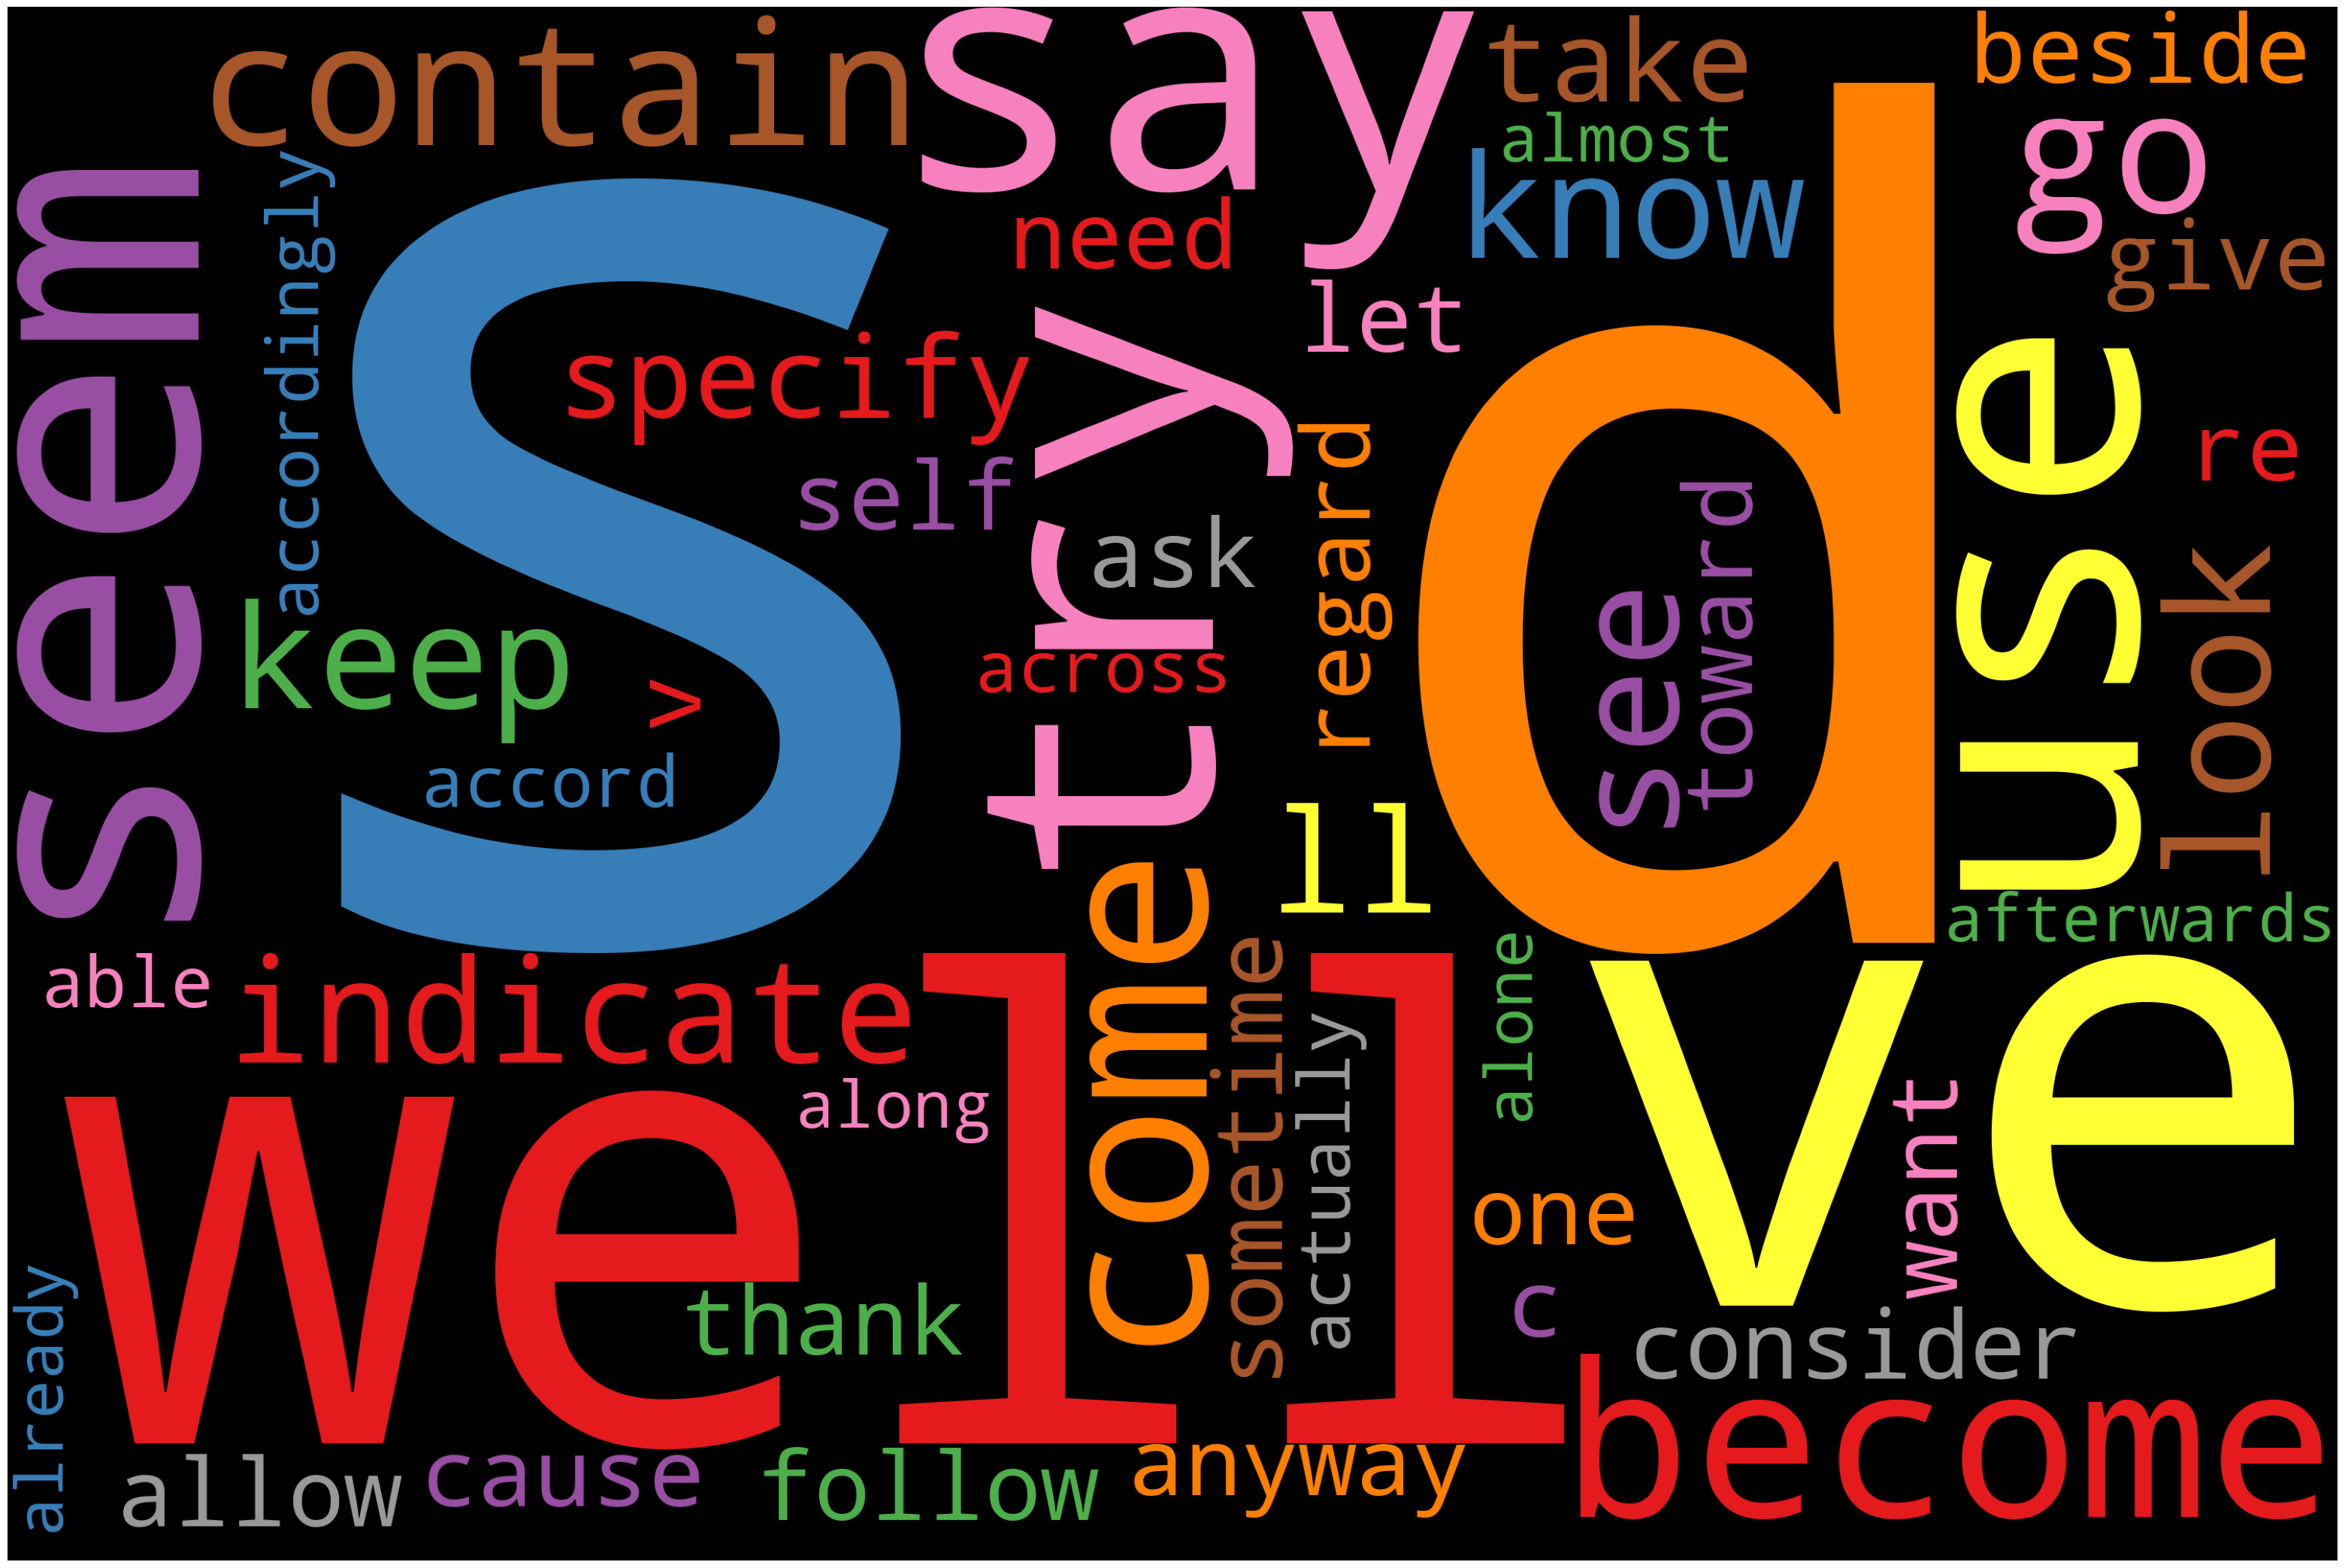

In [33]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis('off')

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                    colormap='Set1',stopwords=STOPWORDS).generate(clean_sw)
plot_cloud(wordcloud)

Named Entity Recognition

In [34]:
nlp=spacy.load('en_core_web_sm')
one_block=clean_sw
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

Emotion Mining(Sentiment Analysis)

In [35]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(sw))
sentences

["a's able about above according accordingly across actually after afterwards again against ain't all allow allows almost alone along already also although always am among amongst an and another any anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate are aren't around as aside ask asking associated at available away awfully b be became because become becomes becoming been before beforehand behind being believe below beside besides best better between beyond both brief but by c c'mon c's came can can't cannot cant cause causes certain certainly changes clearly co com come comes concerning consequently consider considering contain containing contains corresponding could couldn't course currently d definitely described despite did didn't different do does doesn't doing don't done down downwards during e each edu eg eight either else elsewhere enough entirely especially et etc even ever every everybody everyone everything everywhere ex exactly example

In [36]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,a's able about above according accordingly acr...


In [37]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def calculate_sentiment(text):
    nltk.download('vader_lexicon')  # Download the VADER lexicon for sentiment analysis
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    return scores

text = 'great'
sentiment_scores = calculate_sentiment(text)
print(sentiment_scores)


{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [38]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0    {'neg': 0.04, 'neu': 0.835, 'pos': 0.126, 'com...
Name: sentiment_value, dtype: object